**Machine Learning Project 1** 

Brandon Zettek 2/4/2021


Dataset: [College Football Attendance](https://www.kaggle.com/jeffgallini/college-football-attendance-2000-to-2018)

Goal: Predict the total attendance(label) of a college football game based on various statistics(features).

Method used to solve: Random Forest **Regression**

Import data and library that will be used in project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


Put entire CSV data into pandas dataframe

In [2]:
df = pd.read_csv('CFBeattendance.csv', encoding='cp1252', sep=',')


Entire dataset before data pre-processing

**Features:**
1.   Date
2.   Team
3. Time
4. Opponent
5. Rank
6. Site
7. TV
8. Result
9. Current Wins
10. Current Losses
11. Stadium Capacity
12. Fill Rate
13. New Coach
14. Tailgating
15. Precipitation
16. Snow
17. Snow Depth
18. Max. Temperature
19. Min. Temperature
20. Opponents Rank
21. Conference
22. Year
23. Month
24. Day

**Labels:**
1. Attendance








In [5]:
df.head(5)

,Date,Team,Time,Opponent,Rank,Site,TV,Result,Attendance,Current Wins,...,PRCP,SNOW,SNWD,TMAX,TMIN,Opponent_Rank,Conference,Year,Month,Day
0,9/2/2000,Arkansas,8:00 PM,Southwest Missouri State*,NR,"War Memorial StadiumLittle Rock, AR",Not on TV,W 38–0,53946,0,...,0.00,0.0,0.0,105,65,NR,SEC,2000,9,2
1,9/16/2000,Arkansas,6:00 PM,Boise State*,NR,"War Memorial StadiumLittle Rock, AR",Not on TV,W 38–31,54286,1,...,0.00,0.0,0.0,79,44,NR,SEC,2000,9,16
2,9/23/2000,Arkansas,8:00 PM,Alabama,NR,"Razorback StadiumFayetteville, AR",ESPN2,W 28–21,51482,2,...,2.12,0.0,0.0,85,63,NR,SEC,2000,9,23
3,9/30/2000,Arkansas,11:30 AM,No. 25 Georgia,NR,"Razorback StadiumFayetteville, AR",JPS,L 7–38,51162,3,...,0.00,0.0,0.0,77,45,25,SEC,2000,9,30
4,10/7/2000,Arkansas,6:00 PM,Louisiana–Monroe*,NR,"Razorback StadiumFayetteville, AR",Not on TV,W 52–6,50947,3,...,0.00,0.0,0.0,50,28,NR,SEC,2000,10,7


In [6]:
df = df.drop(df.columns[[0, 1, 2, 3, 5, 7, 9, 13, 14, 16, 17, 18, 20, 21, 22, 24]], axis=1)
df

,Rank,TV,Attendance,Current Losses,Stadium Capacity,Fill Rate,PRCP,TMIN,Month
0,NR,Not on TV,53946,0,53727,1.004076,0.00,65,9
1,NR,Not on TV,54286,0,53727,1.010404,0.00,44,9
2,NR,ESPN2,51482,0,50019,1.029249,2.12,63,9
3,NR,JPS,51162,0,50019,1.022851,0.00,45,9
4,NR,Not on TV,50947,1,50019,1.018553,0.00,28,10
...,...,...,...,...,...,...,...,...,...
6667,NR,ESPN3,19412,3,51500,0.376932,0.00,61,9
6668,NR,beIN,12809,5,51500,0.248718,0.00,67,10
6669,NR,ESPN+,10787,7,51500,0.209456,0.00,49,10
6670,NR,ESPN+,9690,8,51500,0.188155,0.00,44,11


In [7]:
#Make it so the game is classifed as on TV (1) or not on TV(0)

def fixTV(x):
  if x == "Not on TV":
    return 0;
  if x != "Not on TV":
    return 1;
df['TV'] = df['TV'].apply(fixTV)


In [9]:
#Make it so top 25 teams are ranked accordingly and all other teams rank is 100.
def fixRank(x):
  if x == "NR":
    return 100;
  if x != "NR":
    return int(x);
df['Rank'] = df['Rank'].apply(fixRank)

In [10]:
df.head(25)

,Rank,TV,Attendance,Current Losses,Stadium Capacity,Fill Rate,PRCP,TMIN,Month
0,100,0,53946,0,53727,1.004076,0.00,65,9
1,100,0,54286,0,53727,1.010404,0.00,44,9
2,100,1,51482,0,50019,1.029249,2.12,63,9
3,100,1,51162,0,50019,1.022851,0.00,45,9
4,100,0,50947,1,50019,1.018553,0.00,28,10
5,100,0,49647,3,50019,0.992563,0.11,49,11
6,100,1,43982,5,53727,0.818620,0.94,43,11
7,100,1,52213,0,53727,0.971820,0.00,63,8
8,100,0,52683,3,72000,0.731708,0.00,31,10
9,100,1,53514,3,53727,0.996036,0.28,45,10


In [11]:
#Features and Labels
X = df[["Rank", "TV", "Current Losses", "Stadium Capacity", "Fill Rate", "PRCP", "TMIN", "Month"]]
y = df[["Attendance"]]

In [12]:

from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error


In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=9)
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(x_train, y_train.values.ravel())


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
y_pred = pd.DataFrame()
y_pred['predictions'] = regressor.predict(x_test)

In [15]:
y_pred.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_pred = y_pred.astype(int)
predVactual = pd.concat([y_pred, y_test], axis=1)

In [16]:
predVactual.head(50)

,predictions,Attendance
0,39276,39261
1,65830,66250
2,45279,45777
3,16499,16348
4,44792,45540
5,78931,78330
6,42639,42646
7,22275,22105
8,4581,4576
9,82553,82352


In [17]:
#Metrics to evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(511.2357130591681)

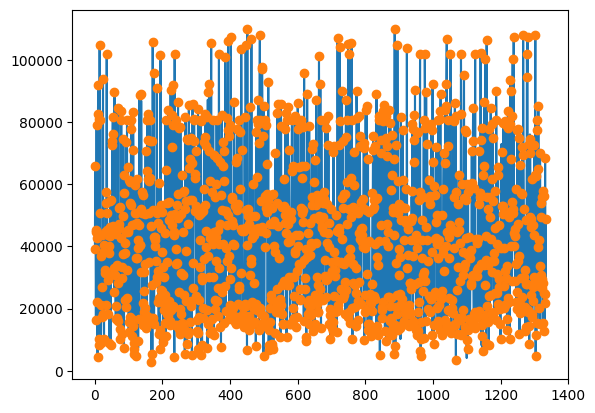

In [18]:
plt.plot(y_test)
plt.plot(y_pred, 'o')

plt.show()